## Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import skew
from scipy import stats
from scipy.stats import chi2_contingency

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import log_loss
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                             f1_score, confusion_matrix, ConfusionMatrixDisplay,
                             roc_curve, auc)

import statsmodels.api as sm

import warnings
warnings.filterwarnings(action='ignore')

print("All Modules Imported Successfully")

All Modules Imported Successfully


## Read Dataset

In [3]:
data = pd.read_csv("../data/adult_income.csv")
adultIncome_df = pd.DataFrame(data)

In [4]:
adultIncome_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## Problem Statement:

In this dataset, we have demographic and employment data of individuals, including details such as age, education, occupation, and marital status, among other features. The income level of these individuals is influenced by various personal and work-related factors. Understanding these factors is crucial for better decision-making, particularly for policy-making, financial services, and targeted interventions aimed at improving financial wellbeing.

---

## The business problem we should solve here is:
Determine which factors most strongly influence an individual’s income level, particularly in identifying those likely to earn above or below $50,000 per year. The dataset allows for a comprehensive analysis of socio-economic patterns and provides a platform to build models that can predict income level based on a variety of demographic and employment-related characteristics.

---

## Objective:
Perform exploratory data analysis (EDA) and develop models to identify the most significant factors affecting income, assess various feasible models, and determine the most appropriate model for predicting income levels.

## Variable Description

1. age: The age of the individual.
2. workclass: Type of employment (e.g., Private, Government, Self-Employed).
3. fnlwgt: Final sample weight, representing how many people the individual represents.
4. education: The highest level of education attained (e.g., Bachelors, HS-grad).
5. education-num: Numerical representation of education level.
6. marital-status: The marital status of the individual (e.g., Married, Never-married).
7. occupation: The individual’s occupation category (e.g., Exec-managerial, Craft-repair).
8. relationship: The relationship status within a family (e.g., Husband, Wife, Not-in-family).
9. race: The race of the individual (e.g., White, Black, Asian).
10. sex: Gender of the individual (Male, Female).
11. capital-gain: Capital gains from investments.
12. capital-loss: Losses from investments.
13. hours-per-week: The number of hours worked per week.
14. native-country: The country of origin for the individual.
15. income: Binary target variable representing whether the individual's income is greater than or less than $50,000 per year.


## Overview of the Dataset

In [8]:
adultIncome_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Checking Missing Values

In [10]:
adultIncome_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## Fill '?' Values with 'Others' of different Features

In [17]:
adultIncome_df['workclass'].replace('?', 'Others', inplace=True)
adultIncome_df['occupation'].replace('?', 'Others', inplace=True)
adultIncome_df['native.country'].replace('?', 'Others', inplace=True)

## Univariate Analysis

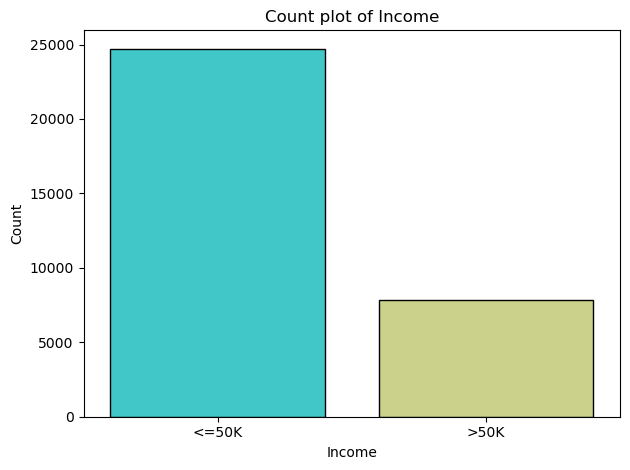

In [20]:
sns.countplot(x = adultIncome_df['income'], palette = "rainbow", edgecolor='black')
plt.title('Count plot of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

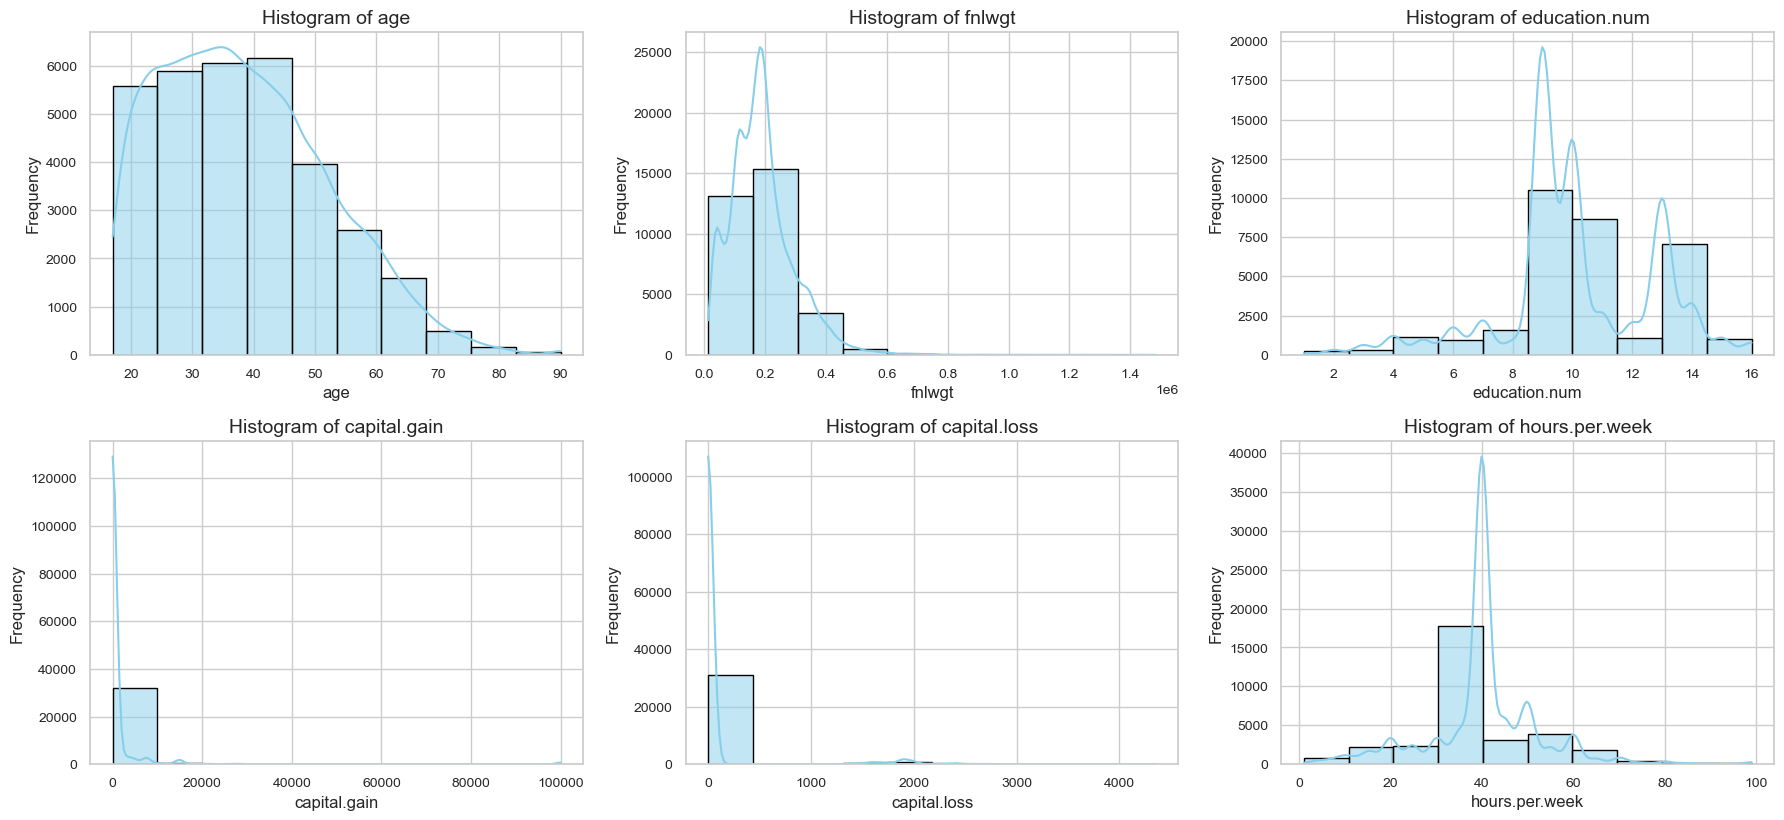

In [22]:
numerical_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

sns.set(style="whitegrid")
plt.rcParams.update({'axes.titlesize': 14, 'axes.labelsize': 12, 'xtick.labelsize': 10, 'ytick.labelsize': 10})

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(adultIncome_df[col], kde = True, color='skyblue', edgecolor='black', bins=10)
    plt.title(f'Histogram of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



### Insights

1. **Age**: 
   - Distribution is slightly right-skewed.
   - Most individuals are between the ages of 20 and 50, with a peak around 35-40.
   - Fewer older individuals, with very few beyond 70.

2. **fnlwgt (Final weight)**:
   - This variable seems to have a highly right-skewed distribution.
   - The majority of the values are concentrated below 400,000, but there are some very high outliers.

3. **Education.num (Years of education)**:
   - This variable shows multiple peaks.
   - There is a prominent peak around 9-10 years of education and a smaller peak around 13 years.
   - The distribution suggests groupings around certain education levels, with fewer individuals having very low or very high education years.

4. **Capital gain**:
   - Extremely right-skewed, with the majority of individuals having a capital gain close to 0.
   - There are some outliers where a few individuals report significantly high capital gains.

5. **Capital loss**:
   - Similar to capital gain, highly skewed, with most values at 0 and a few outliers reporting high losses.

6. **Hours per week**:
   - This variable is somewhat right-skewed.
   - Most individuals work around 40 hours per week, with smaller peaks at other common work durations like 20 or 50 hours.

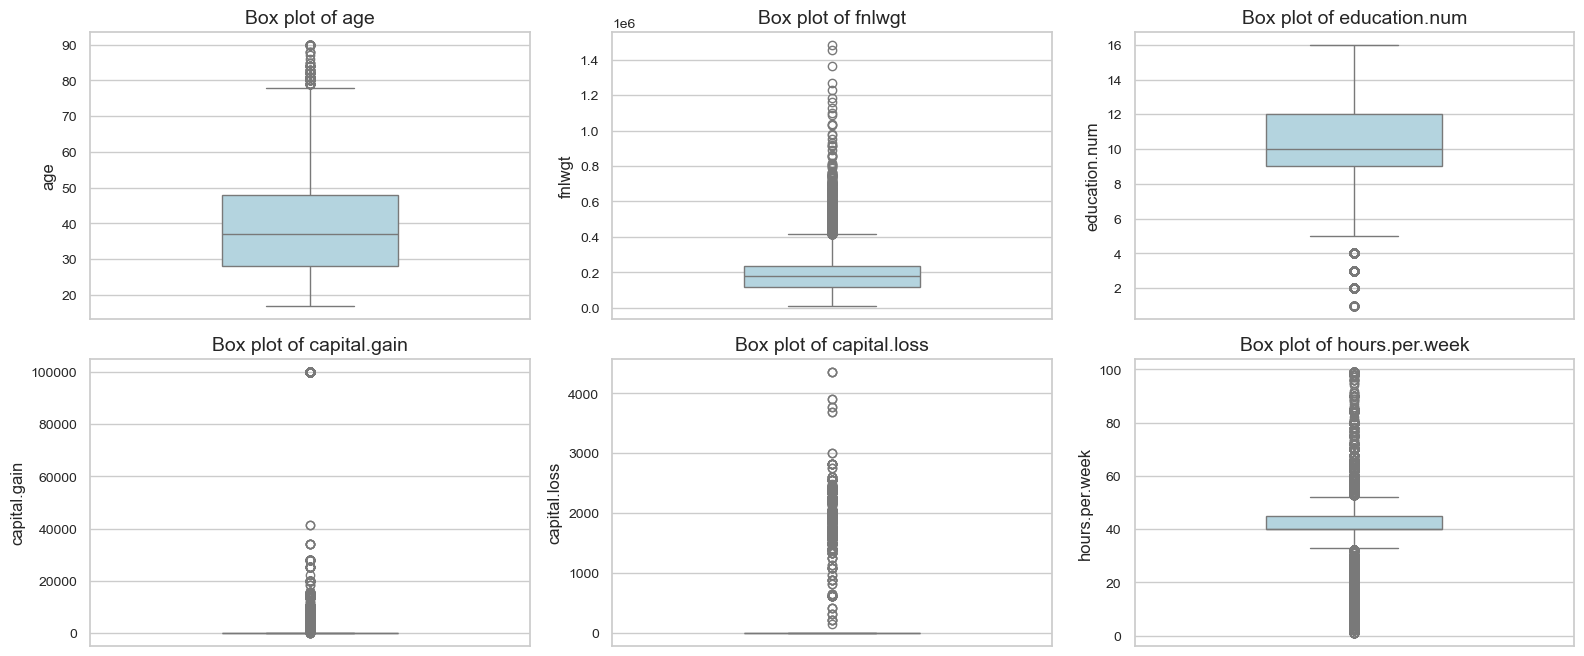

In [24]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y = adultIncome_df[col], color='lightblue', width=0.4)
    plt.title(f'Box plot of {col}')
    plt.ylabel(f'{col}')

plt.tight_layout()
plt.show()

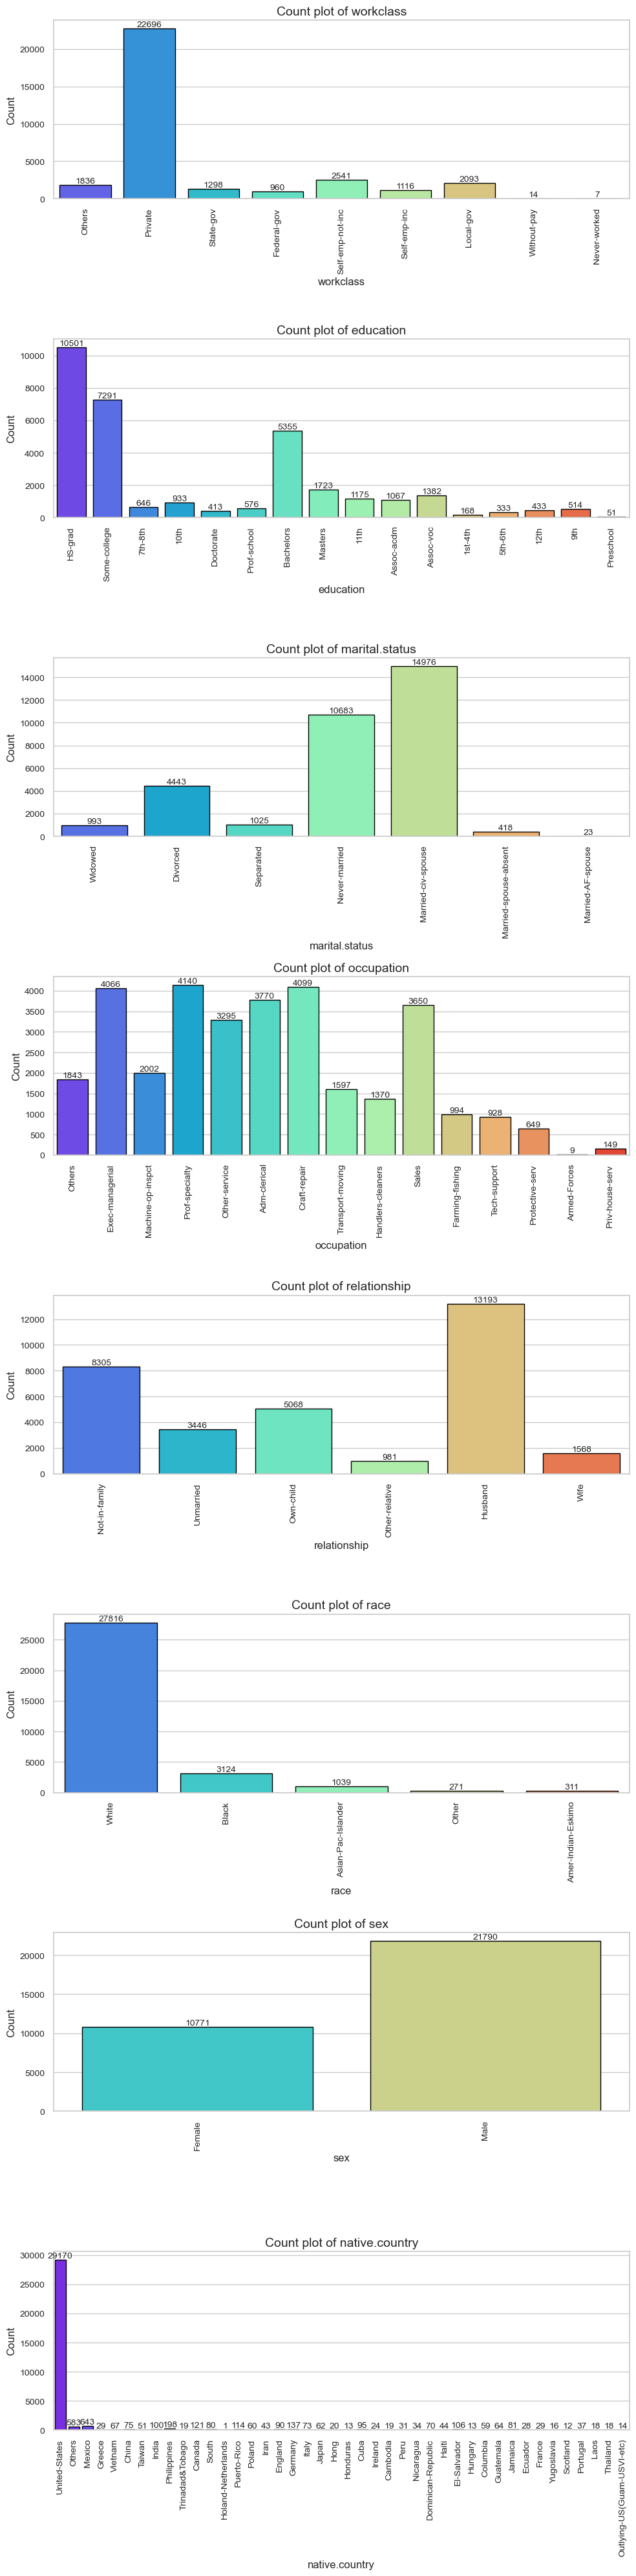

In [25]:
plt.figure(figsize=(10, len(categorical_cols) * 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(x=adultIncome_df[col], palette="rainbow", edgecolor='black')
    plt.title(f'Count plot of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    for p in plt.gca().patches:
        plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                           ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


### Insights

1. **Workclass**:
   - The majority of individuals are employed in the "Private" sector (over 22,000).
   - Smaller numbers are in government roles (local, state, and federal), self-employed, and other categories.
   - There are some missing or unclassified data, as indicated by "?" and "Without-pay" categories.

2. **Education**:
   - "HS-grad" (High School graduate) is the most common education level, followed by "Some-college" and "Bachelors".
   - Lower levels of education, such as "10th" or "11th grade," have fewer individuals.
   - Very few individuals have advanced degrees like a "Doctorate" or "Prof-school" (professional school degrees).

3. **Marital Status**:
   - "Married-civ-spouse" is the most frequent category, indicating a large portion of the population is married.
   - "Never-married" is also a significant group, while widowed, separated, and divorced categories are less common.

4. **Occupation**:
   - The most frequent occupations include "Prof-specialty" (professional specialty), "Exec-managerial" (executive and managerial), and "Craft-repair."
   - Lesser occupations like "Priv-house-serv" (private household services) and "Armed-Forces" have minimal representation.

5. **Relationship**:
   - The majority of individuals identify as "Husband" or "Not-in-family" (i.e., not part of a traditional nuclear family structure).
   - There are smaller groups of "Own-child," "Unmarried," and "Wife," indicating various family structures.

6. **Race**:
   - A large majority (over 27,000) identify as "White."
   - "Black" is the second most common race, followed by "Asian-Pac-Islander" and "Amer-Indian-Eskimo."
   - Other races form a small fraction of the dataset.

7. **Sex**:
   - The distribution shows a larger number of "Male" individuals than "Female," with around 21,790 males and 10,771 females.

8. **Native Country**:
   - The majority (over 29,000) of individuals are from the "United-States."
   - There are very small counts from countries like Iran, Laos, and Ecuador

## Summary Statistics

In [30]:
adultIncome_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Skewness and Kurtosis

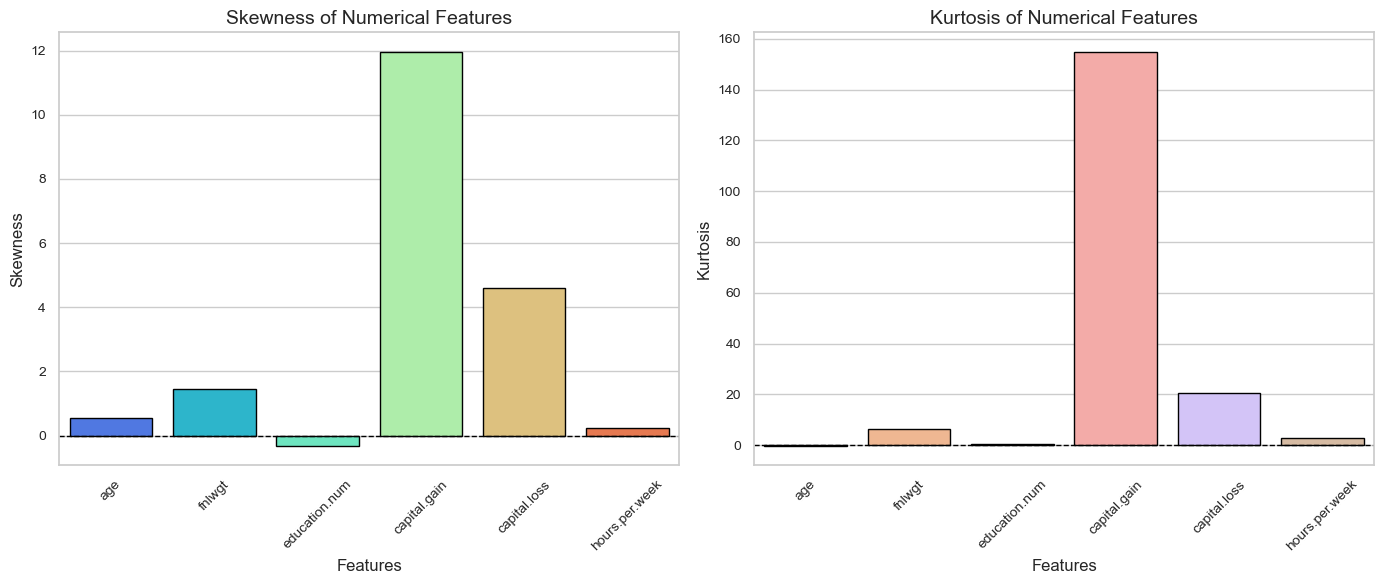

In [32]:
# Calculate skewness and kurtosis for numerical columns only
skewness_values_filtered = adultIncome_df[numerical_cols].skew()
kurtosis_values_filtered = adultIncome_df[numerical_cols].kurtosis()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Skewness barplot
sns.barplot(x=skewness_values_filtered.index, y=skewness_values_filtered.values, palette='rainbow', ax=ax[0], edgecolor='black')
ax[0].set_title('Skewness of Numerical Features')
ax[0].set_xlabel('Features')
ax[0].set_ylabel('Skewness')
ax[0].axhline(0, color='black', linewidth=1, linestyle='--')
ax[0].set_xticklabels(skewness_values_filtered.index, rotation=45)

# Kurtosis barplot
sns.barplot(x=kurtosis_values_filtered.index, y=kurtosis_values_filtered.values, palette='pastel', ax=ax[1], edgecolor='black')
ax[1].set_title('Kurtosis of Numerical Features')
ax[1].set_xlabel('Features')
ax[1].set_ylabel('Kurtosis')
ax[1].axhline(0, color='black', linewidth=1, linestyle='--')
ax[1].set_xticklabels(kurtosis_values_filtered.index, rotation=45)

plt.tight_layout()
plt.show()


### Insights

#### Skewness Insights:
1. **Capital Gain**: Extremely right-skewed (high positive skewness), indicating that most people report a very low capital gain, but there are a few who report significantly large values.
2. **Capital Loss**: Also positively skewed but to a lesser extent than capital gain. This indicates that most individuals have low capital losses, but there are some extreme values.
3. **fnlwgt**: Slightly right-skewed, showing a mild concentration of lower values with a few higher outliers.
4. **Hours per week** and **age**: Both have low skewness values, indicating that these variables are relatively symmetric in their distribution.
5. **Education.num**: Almost no skewness, suggesting a balanced or symmetric distribution.

#### Kurtosis Insights:
1. **Capital Gain**: Extremely high kurtosis (over 150), indicating the presence of significant outliers (i.e., a few individuals with exceptionally high capital gains). This distribution has heavy tails.
2. **Capital Loss**: Elevated kurtosis, though not as extreme as capital gain, also indicating the presence of outliers.
3. **fnlwgt**: Slightly higher kurtosis than 0, indicating some level of outliers but not overly extreme.
4. **Age**, **Education.num**, and **Hours per week**: Low kurtosis values indicate these distributions are relatively normal, with fewer outliers and less extreme values compared to capital gain and capital loss.

## Variable Binning or Bucketing

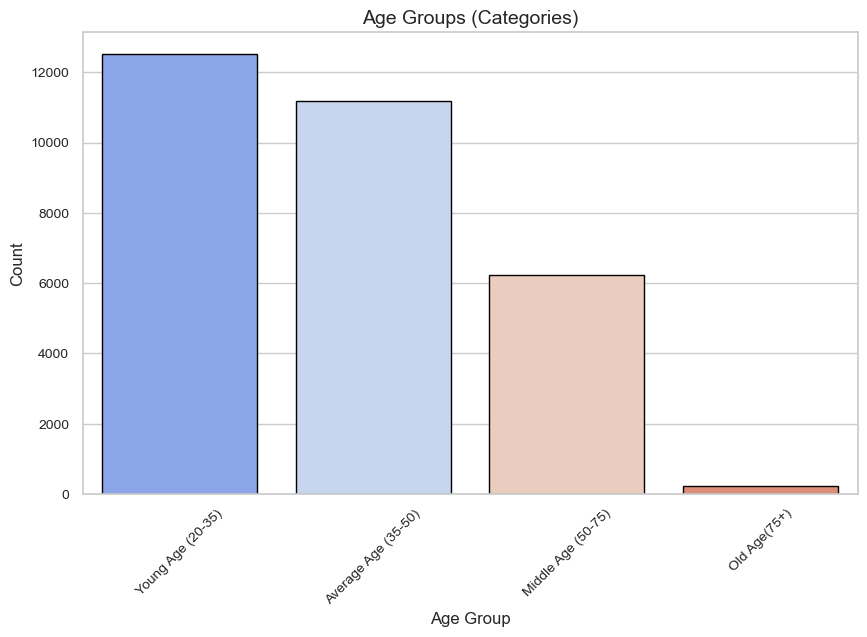

In [38]:
age_bins = [20, 35, 50, 75, float('inf')]
age_labels = ['Young Age (20-35)', 'Average Age (35-50)', 'Middle Age (50-75)', 'Old Age(75+)']

adultIncome_df['age_group'] = pd.cut(adultIncome_df['age'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(10, 6))
sns.countplot(data = adultIncome_df, x='age_group', palette='coolwarm',  edgecolor='black')
plt.title('Age Groups (Categories)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

***Insights***


## Bivariate Analysis

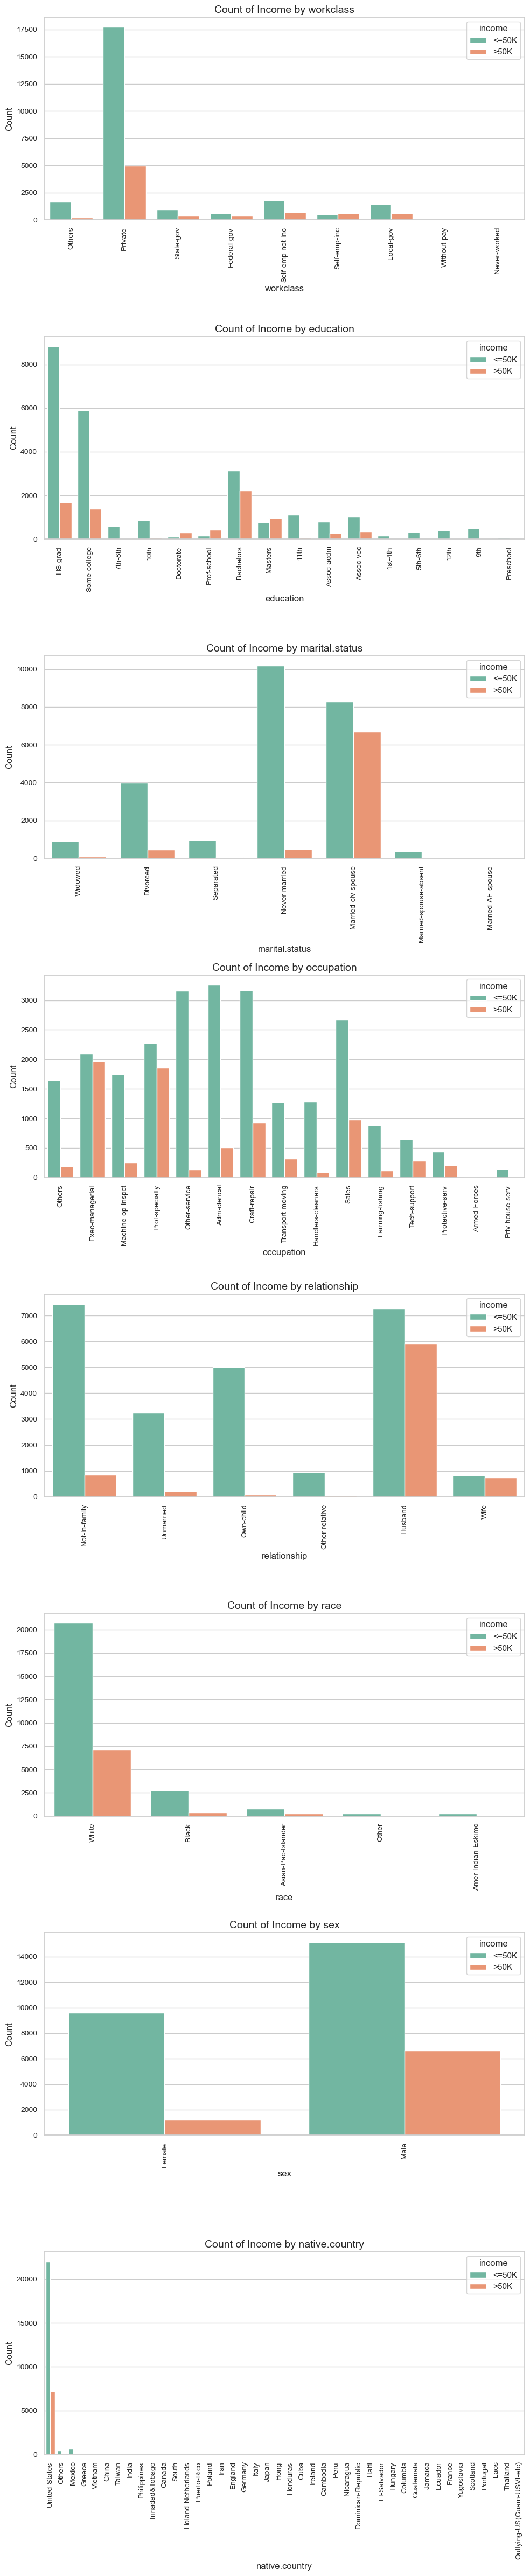

In [42]:
##CATEGORICAL VARIABLES

# Set the size of the plot
plt.figure(figsize=(10, 6 * len(categorical_cols)))

# Loop through each categorical column and create a bar plot
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)
    sns.countplot(data=adultIncome_df, x=col, hue='income', palette='Set2')
    plt.title(f'Count of Income by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation = 90)  # Rotate x-axis labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Insights

1. **Workclass:**
   - Private sector has the highest count for both income brackets, with a much larger number in the "<=50K" category.
   - Self-employed (not incorporated) shows a notable difference between income brackets.

2. **Education:**
   - HS-grad (high school graduates) have the highest count in the "<=50K" bracket.
   - Bachelors and Masters degree holders show significant counts in both income brackets, with higher numbers in the "<=50K" category.

3. **Marital Status:**
   - Married-civ-spouse category has the highest counts in both income brackets, with a larger number in the ">50K" bracket.
   - Never-married individuals show a high count in the "<=50K" bracket but much lower in the ">50K" bracket.

4. **Occupation:**
   - Prof-specialty and Exec-managerial categories have high counts in both income brackets.
   - Craft-repair, Sales, and Admin-clerical show notable differences between income brackets.

5. **Relationship:**
   - Husband category has the highest count in both income brackets, especially in the ">50K" bracket.
   - Not-in-family and Own-child categories show high counts in the "<=50K" bracket but much lower in the ">50K" bracket.

6. **Race:**
   - White category has significantly higher counts in both income brackets compared to other races.

7. **Sex:**
   - Males have higher counts in both income brackets compared to females.
   - The disparity is particularly noticeable in the ">50K" bracket.

8. **Native Country:**
   - United States has overwhelmingly higher counts compared to other countries in both income brackets.

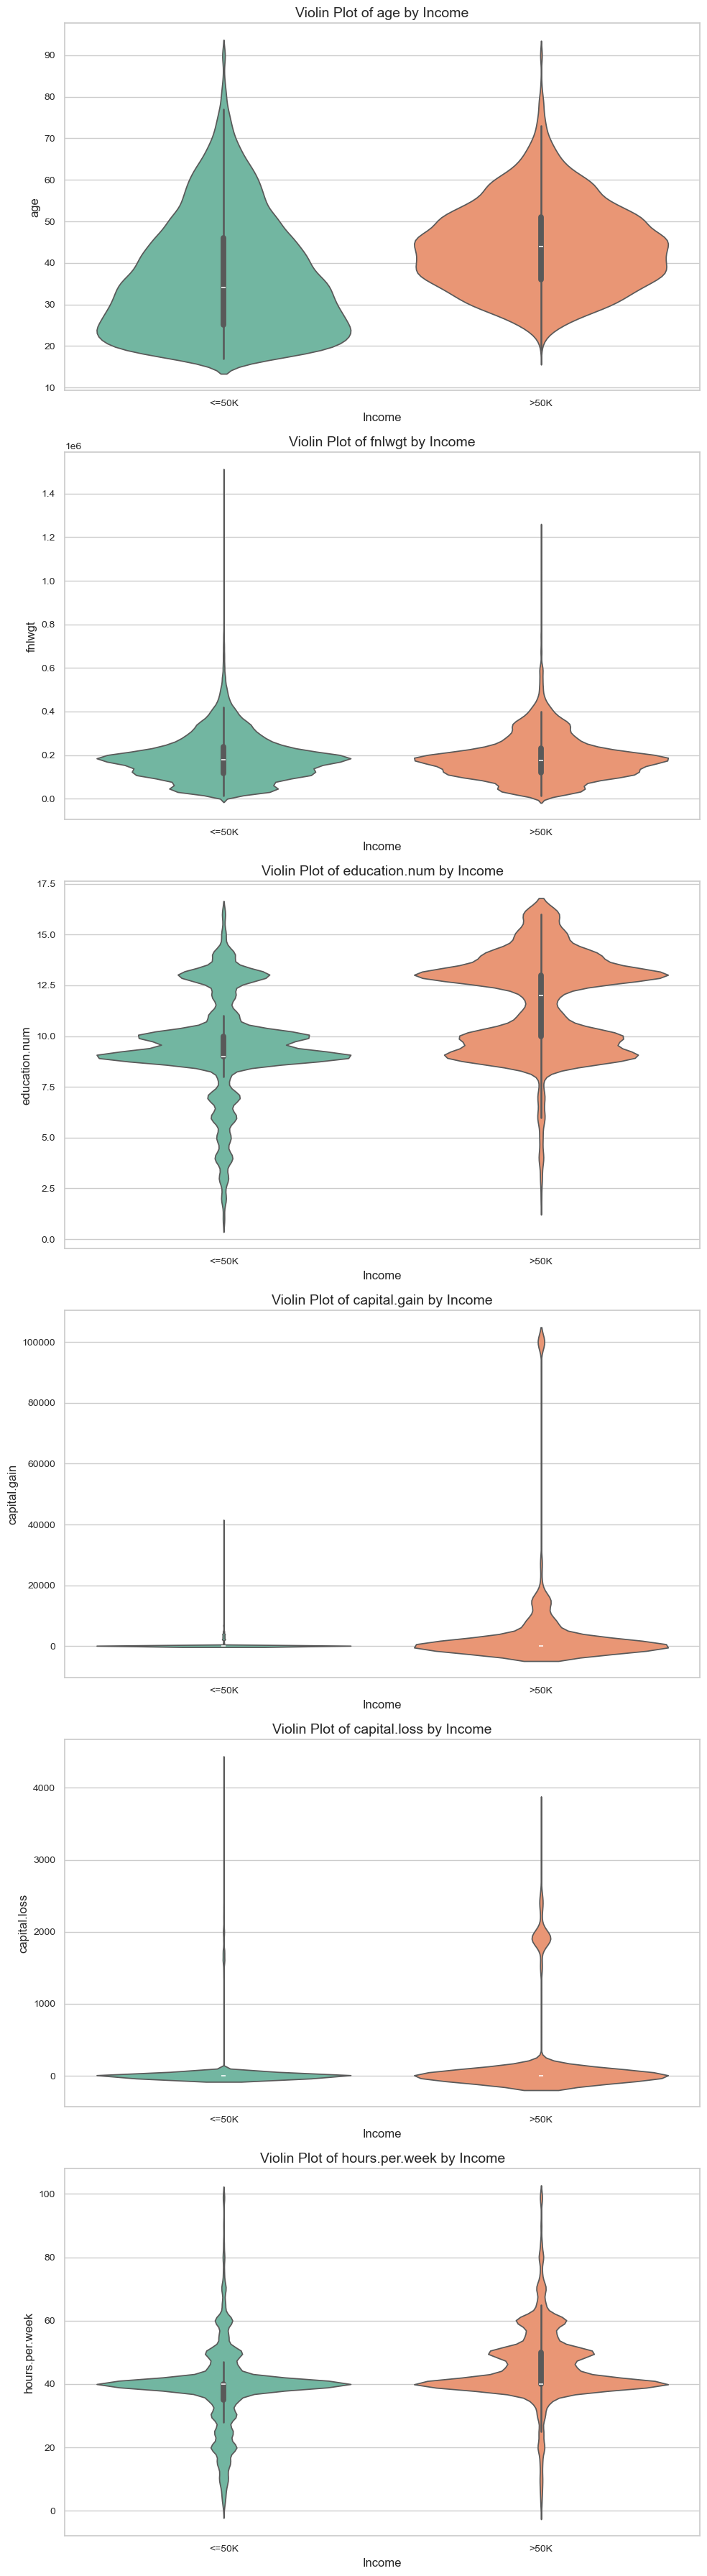

In [44]:
## NUMERICAL VARIABLE

plt.figure(figsize=(10, 6 * len(numerical_cols)))

# Loop through each numerical column and create a violin plot
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)
    sns.violinplot(data=adultIncome_df, x='income', y=col, palette='Set2')
    plt.title(f'Violin Plot of {col} by Income')
    plt.xlabel('Income')
    plt.ylabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Insights

1. **Age by Income:**
   - The ">50K" group tends to be older on average, with a peak around 40-50 years.
   - The "<=50K" group has a younger distribution, peaking around 25-35 years.
   - Both groups show a wide age range, but the higher income group has fewer young individuals.

2. **fnlwgt (Final Weight) by Income:**
   - Both income groups show similar distributions for this attribute.
   - The distributions are relatively symmetrical with a slight positive skew.
   - There's no clear distinction between the groups based on this factor.

3. **Education Num (Years of Education) by Income:**
   - The ">50K" group shows a higher concentration of individuals with more years of education.
   - The "<=50K" group has a more spread-out distribution, with peaks at lower education levels.
   - There's a clear correlation between higher education and higher income.

4. **Capital Gain by Income:**
   - Most individuals in both groups have low or no capital gains.
   - The ">50K" group shows some individuals with very high capital gains, creating a long upper tail.
   - Capital gains appear to be more common and higher in the ">50K" group.

5. **Capital Loss by Income:**
   - Similar to capital gains, most individuals in both groups have low or no capital losses.
   - The ">50K" group shows slightly higher and more frequent capital losses.
   - The difference between groups is less pronounced than with capital gains.

6. **Hours per Week by Income:**
   - Both groups show a strong peak around 40 hours per week.
   - The ">50K" group has a higher concentration of individuals working more than 40 hours.
   - The "<=50K" group shows more variation in hours worked, with more individuals working part-time hours.

## Parametric and Non-Parametric Tests

In [47]:
## ANOVA Test

adultIncome_df['income_binary'] = adultIncome_df['income'].apply(lambda x: 1 if x == '>50K' else 0)

occupation_groups = [group['income_binary'].values for name, group in adultIncome_df.groupby('occupation')]
f_statistic_occupation, p_value_occupation = stats.f_oneway(*occupation_groups)

marital_status_groups = [group['income_binary'].values for name, group in adultIncome_df.groupby('marital.status')]
f_statistic_marital, p_value_marital = stats.f_oneway(*marital_status_groups)

sex_groups = [group['income_binary'].values for name, group in adultIncome_df.groupby('sex')]
f_statistic_sex, p_value_sex = stats.f_oneway(*sex_groups)

print("ANOVA Results:")
print(f"Occupation - F-statistic: {f_statistic_occupation}, P-value: {p_value_occupation}")
print(f"Marital Status - F-statistic: {f_statistic_marital}, P-value: {p_value_marital}")
print(f"Sex - F-statistic: {f_statistic_sex}, P-value: {p_value_sex}")


ANOVA Results:
Occupation - F-statistic: 328.54918709801683, P-value: 0.0
Marital Status - F-statistic: 1357.8598024082576, P-value: 0.0
Sex - F-statistic: 1593.107907446717, P-value: 0.0


In [51]:
## CHI-SQUARE TEST

occupation_table = pd.crosstab(adultIncome_df['occupation'], adultIncome_df['income'])
chi2_statistic_occupation, p_value_occupation, dof_occupation, expected_occupation = chi2_contingency(occupation_table)

marital_status_table = pd.crosstab(adultIncome_df['marital.status'], adultIncome_df['income'])
chi2_statistic_marital, p_value_marital, dof_marital, expected_marital = chi2_contingency(marital_status_table)

sex_table = pd.crosstab(adultIncome_df['sex'], adultIncome_df['income'])
chi2_statistic_sex, p_value_sex, dof_sex, expected_sex = chi2_contingency(sex_table)

print("Chi-Square Test Results:")
print(f"Occupation - Chi-Squared Statistic: {chi2_statistic_occupation}, P-value: {p_value_occupation}, Degrees of Freedom: {dof_occupation}")
print(f"Marital Status - Chi-Squared Statistic: {chi2_statistic_marital}, P-value: {p_value_marital}, Degrees of Freedom: {dof_marital}")
print(f"Sex - Chi-Squared Statistic: {chi2_statistic_sex}, P-value: {p_value_sex}, Degrees of Freedom: {dof_sex}")

Chi-Square Test Results:
Occupation - Chi-Squared Statistic: 4031.9742802471806, P-value: 0.0, Degrees of Freedom: 14
Marital Status - Chi-Squared Statistic: 6517.741653663022, P-value: 0.0, Degrees of Freedom: 6
Sex - Chi-Squared Statistic: 1517.813409134445, P-value: 0.0, Degrees of Freedom: 1


## Multivariate Analysis

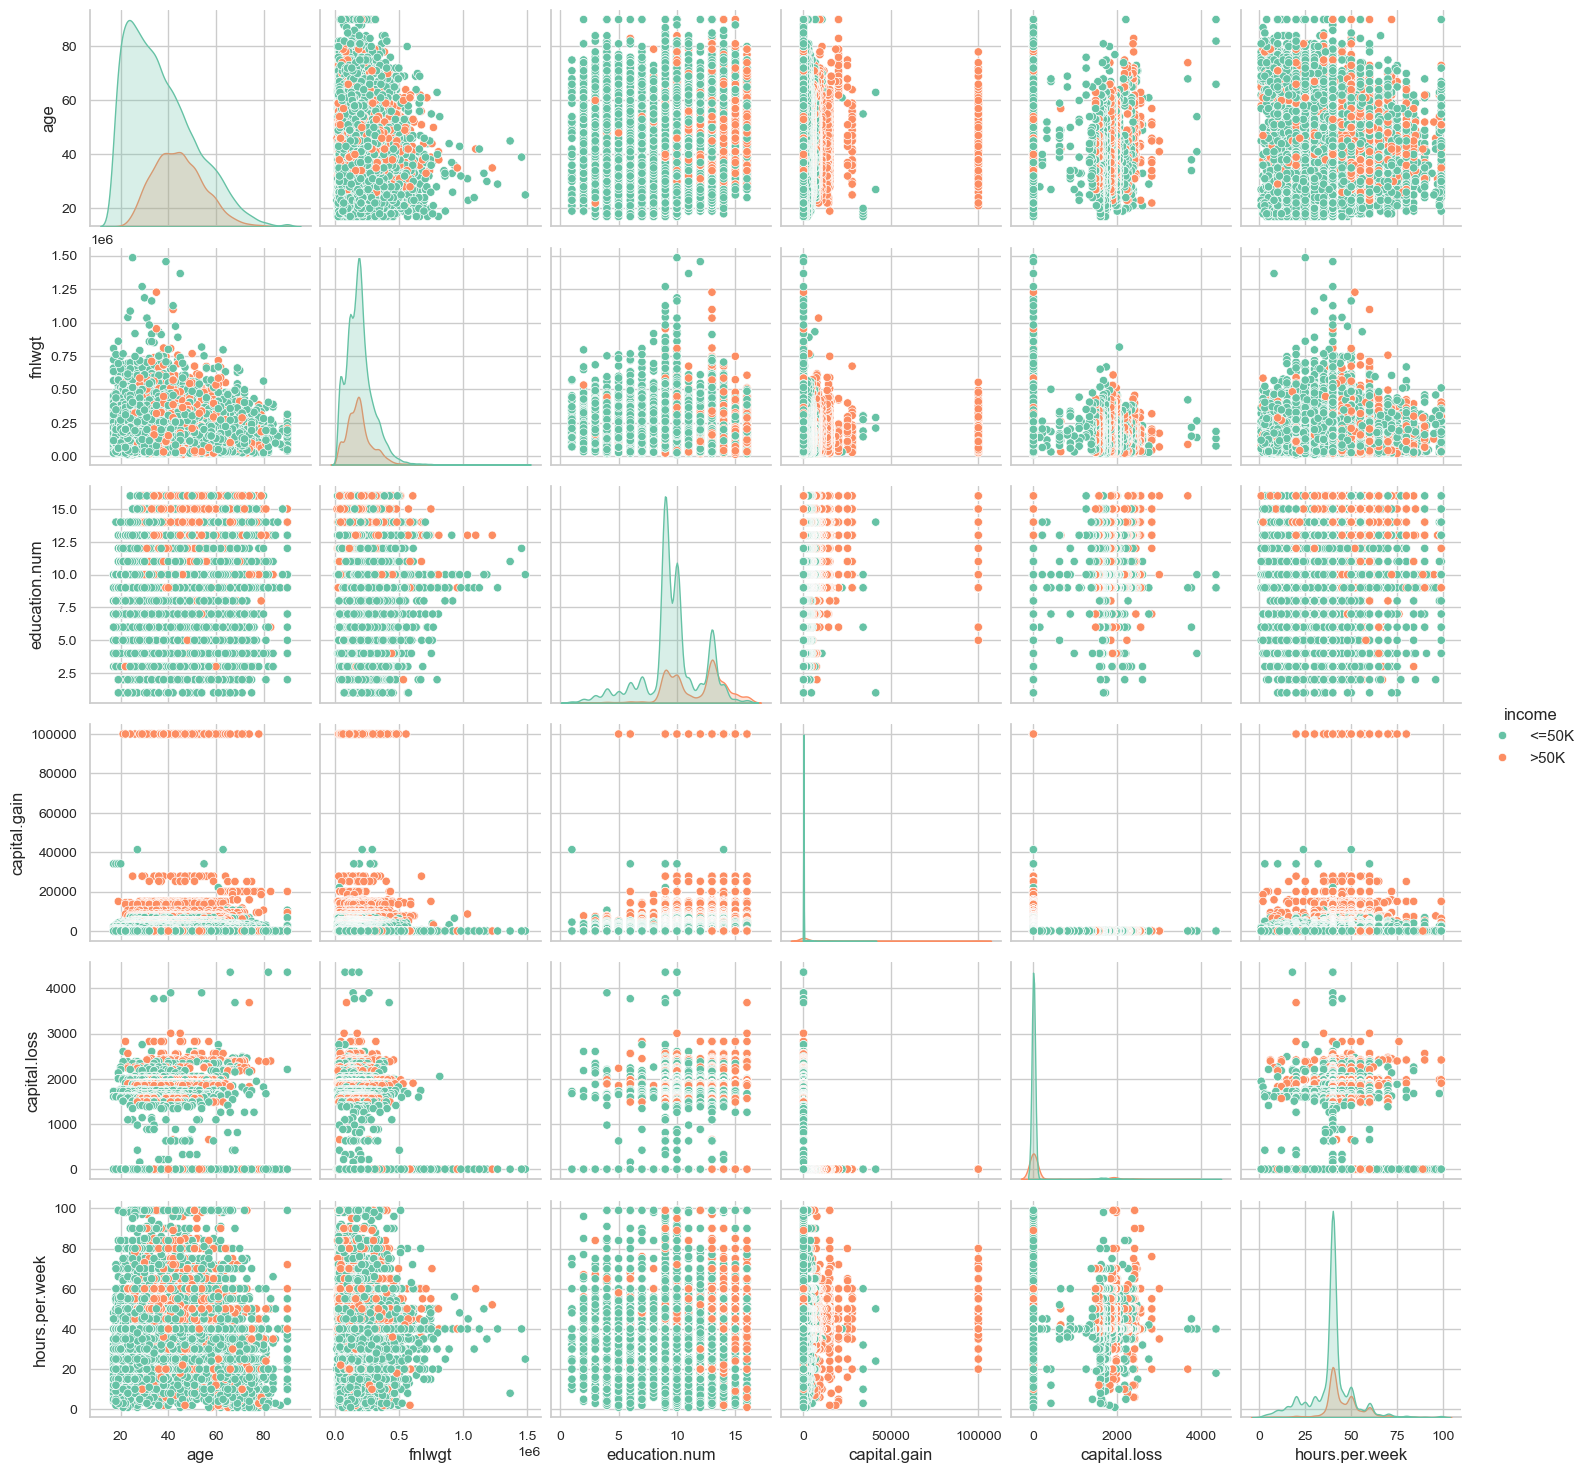

In [54]:
adultIncome_df['income'] = adultIncome_df['income'].astype('category')

# List of numerical columns to include in the pair plot
numerical_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

# Create a pair plot
sns.pairplot(adultIncome_df, vars=numerical_cols, hue='income', palette='Set2')

# Show the plot
plt.show()


### Insights

1. **Age:**
   - The >50K group tends to be older, with a higher concentration between 40-60 years.
   - The <=50K group has a more even distribution across ages, with more representation in younger age ranges.

2. **fnlwgt (Final Weight):**
   - No clear distinction between income groups based on this attribute.
   - Both groups show a wide range of values with similar distributions.

3. **Education Num (Years of Education):**
   - Strong correlation between education and income.
   - The >50K group has a higher concentration at higher education levels (12-16 years).
   - The <=50K group shows more variability, with significant representation at lower education levels.

4. **Capital Gain:**
   - Most individuals in both groups have little to no capital gains.
   - The >50K group has more instances of high capital gains, with some very high outliers.

5. **Capital Loss:**
   - Similar to capital gains, most individuals have little to no capital losses.
   - The >50K group shows slightly more instances of capital losses.

6. **Hours per Week:**
   - Both groups show a strong concentration around 40 hours per week.
   - The >50K group tends to have more individuals working longer hours (40-60 per week).
   - The <=50K group has more variability, including more part-time workers.

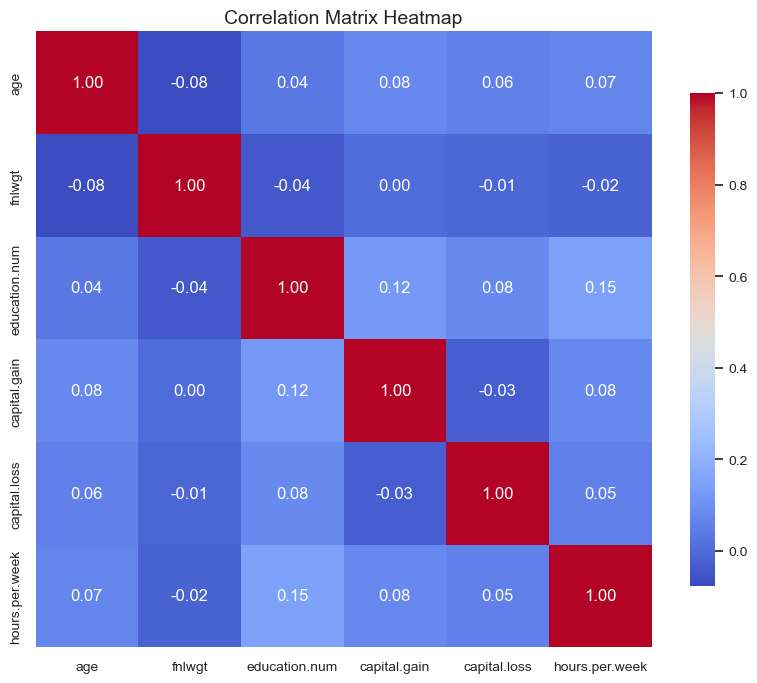

In [57]:
# List of numerical columns
numerical_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

# Calculate the correlation matrix
correlation_matrix = adultIncome_df[numerical_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set the title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()


### Insights

1. **Fnlwgt (Final Weight):**
   This variable shows very weak negative correlations with most other variables, suggesting it might not be strongly related to the other attributes in predicting income.

2. **Education and Hours per Week:**
   The strongest positive correlation (0.15) outside the diagonal is between education level (education num) and hours worked per week. This suggests that individuals with higher education tend to work slightly longer hours.

3. **Education and Capital Gain:**
   There's a weak positive correlation (0.12) between education level and capital gains, indicating that more educated individuals might have slightly higher capital gains.

4. **Age and other variables:**
   - Age has a very weak positive correlation with capital gain (0.08) and hours per week (0.07).
   - Interestingly, age has a weak negative correlation with fnlwgt (-0.08), though the meaning of this is unclear without more context on what fnlwgt represents.


5. **Capital Gain and Capital Loss:**
   There's a very weak negative correlation (-0.03) between capital gains and capital losses, suggesting that they don't strongly influence each other.

## Feature Importance

           Feature  Importance
7     relationship      0.3557
14       age_group      0.2981
5   marital.status      0.2810
4    education.num      0.2213
1        workclass      0.1187
9              sex      0.0807
6       occupation      0.0717
13  native.country      0.0513
8             race      0.0406
12  hours.per.week      0.0174
3        education      0.0093
0              age      0.0032
11    capital.loss      0.0007
10    capital.gain      0.0003
2           fnlwgt      0.0000


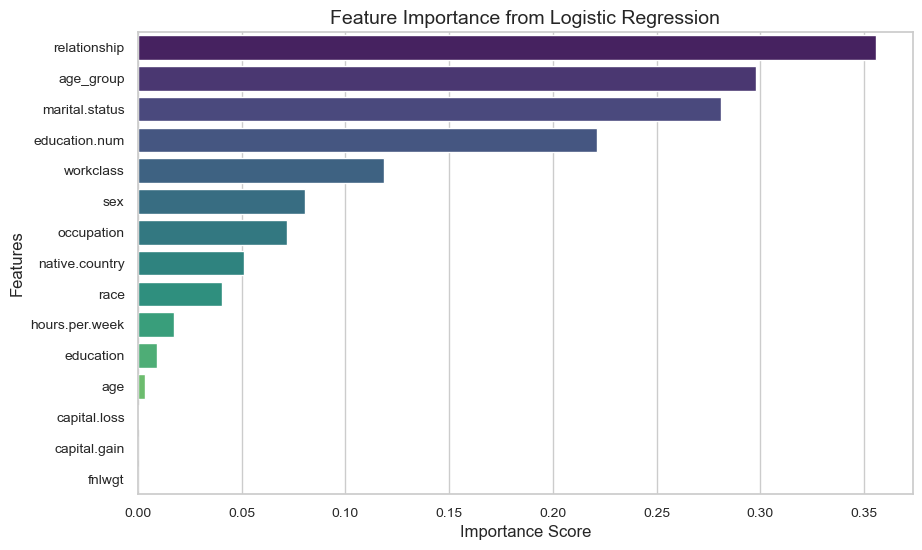

In [63]:
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'age_group']

for col in categorical_cols:
    le = LabelEncoder()
    adultIncome_df[col] = le.fit_transform(adultIncome_df[col].astype(str))

X = adultIncome_df.drop(['income', 'income_binary'], axis=1)  # Features
y = adultIncome_df['income']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

importance = np.abs(model.coef_[0])

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

feature_importance_df['Importance'] = feature_importance_df['Importance'].round(4)

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


### Feature Importance - Insights

1. **Relationship**: Strongly influences income classification, with stable relationships often correlating with higher income.

2. **Marital Status**: Married individuals tend to have higher income levels compared to singles or divorced individuals.

3. **Work Class**: The type of work class significantly affects income, with certain classes linked to higher-paying jobs.

4. **Education Number**: Higher years of education correlate positively with better income prospects.

5. **Race**: Racial demographics may influence income, reflecting broader societal and economic disparities.

6. **Sex**: Gender plays a role in income classification, highlighting existing wage gaps between genders.

7. **Education**: While important, the number of years of education is more impactful than the type of degree.

8. **Occupation**: Occupation type has some relevance, but other factors might overshadow it in predicting income.

9. **Native Country**: Minimal influence on income classification, suggesting socio-economic factors are more telling.

10. **Hours per Week**: Working hours have low impact, indicating that more hours don't always correlate with higher income.

11. **Age**: Age has negligible importance, suggesting other factors are more predictive of income levels.

12. **Capital Loss**: Very low importance indicates that capital loss does not significantly influence income classification.

13. **Capital Gain**: Minimal impact shows that investment income is less significant compared to wage income.

14. **Fnlwgt**: Negligible importance suggests it does not provide meaningful information for predicting income classification.

## Feasible Model Building and Model Selection

In [67]:
X = adultIncome_df.drop(['income_binary', 'income'], axis=1)
y = adultIncome_df['income_binary']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## ---------- FUNCTION FOR CALCULATING METRICS ----------

def calculate_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'F1 Score': f1_score(y_true, y_pred, average='weighted')
    }

## ---------- FUNCTION FOR CALCULATING K-FOLD SCORES ----------

def calculate_kfold_scores(model, X, y, folds=25):
    scores = cross_val_score(model, X, y, cv=folds, scoring='accuracy')
    return scores.mean()

## ---------- NAIVE BAYES CLASSIFIER ----------

### Multinomial Naive Bayes
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train, y_train)
y_pred_val_multinomial_nb = multinomial_nb.predict(X_val)

### Bernoulli Naive Bayes
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)
y_pred_val_bernoulli = bernoulli_nb.predict(X_val)

### Metrics for All the Naive Bayes Models
multinomial_metrics_nb = calculate_metrics(y_val, y_pred_val_multinomial_nb)
bernoulli_metrics = calculate_metrics(y_val, y_pred_val_bernoulli)

## ---------- DECISION TREE CLASSIFIER ----------

### Decision Tree with Gini Index
decision_tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
decision_tree_gini.fit(X_train, y_train)
y_pred_val_tree_gini = decision_tree_gini.predict(X_val)

### Decision Tree with Entropy
decision_tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_tree_entropy.fit(X_train, y_train)
y_pred_val_tree_entropy = decision_tree_entropy.predict(X_val)

### Metrics for all Decision Tree Models
gini_metrics = calculate_metrics(y_val, y_pred_val_tree_gini)
entropy_metrics = calculate_metrics(y_val, y_pred_val_tree_entropy)

# ## ---------- SUPPORT VECTOR MACHINE CLASSIFIER ----------

# ### SVM with Linear Kernel
# svm_linear = SVC(kernel='linear')
# svm_linear.fit(X_train, y_train)
# y_pred_val_svm_linear = svm_linear.predict(X_val)

# ### SVM with RBF Kernel
# svm_rbf = SVC(kernel='rbf')
# svm_rbf.fit(X_train, y_train)
# y_pred_val_svm_rbf = svm_rbf.predict(X_val)

# ### SVM with Polynomial Kernel with degree 2
# svm_poly = SVC(kernel='poly', degree=2)
# svm_poly.fit(X_train, y_train)
# y_pred_val_svm_poly_2 = svm_poly.predict(X_val)

# ### SVM with Polynomial Kernel with degree 3
# svm_poly = SVC(kernel='poly', degree=3)
# svm_poly.fit(X_train, y_train)
# y_pred_val_svm_poly_3 = svm_poly.predict(X_val)

# ### Metrics for SVM Models
# # linear_metrics = calculate_metrics(y_val, y_pred_val_svm_linear)
# rbf_metrics = calculate_metrics(y_val, y_pred_val_svm_rbf)
# poly_metrics_2 = calculate_metrics(y_val, y_pred_val_svm_poly_2)
# poly_metrics_3 = calculate_metrics(y_val, y_pred_val_svm_poly_3)

## ---------- FINAL METRIC DATAFRAME ----------

metrics_df_final = pd.DataFrame({
    'Multinomial Naive Bayes': multinomial_metrics_nb,
    'Bernoulli Naive Bayes': bernoulli_metrics,
    # 'Support Vector Machine (Linear Kernel)': linear_metrics,
    # 'Support Vector Machine (RBF Kernel)': rbf_metrics,
    # 'Support Vector Machine (Polynomial Kernel with Degree 2)': poly_metrics_2,
    # 'Support Vector Machine (Polynomial Kernel with Degree 3)': poly_metrics_3,
    'Decision Tree (Gini Index)': gini_metrics,
    'Decision Tree (Entropy)': entropy_metrics,
}).T

metrics_df_final

,Accuracy,Recall,Precision,F1 Score
Multinomial Naive Bayes,0.780098,0.780098,0.754941,0.741463
Bernoulli Naive Bayes,0.784808,0.784808,0.779720,0.781985
Decision Tree (Gini Index),0.813677,0.813677,0.816999,0.815201
Decision Tree (Entropy),0.811630,0.811630,0.813048,0.812313


In [ ]:
# ## ---------- APPLYING K-FOLD CROSS-VALIDATION FOR ALL MODELS ----------

# ### Gaussian Naive Bayes
# kfold_score_gaussian = calculate_kfold_scores(gaussian_nb, X, y)

# ### Multinomial Naive Bayes
# kfold_score_multinomial_nb = calculate_kfold_scores(multinomial_nb, X, y)

# ### Bernoulli Naive Bayes
# kfold_score_bernoulli = calculate_kfold_scores(bernoulli_nb, X, y)

# ### Decision Tree with Gini Index
# kfold_score_tree_gini = calculate_kfold_scores(decision_tree_gini, X, y)

# ### Decision Tree with Entropy
# kfold_score_tree_entropy = calculate_kfold_scores(decision_tree_entropy, X, y)

# ### Support Vector Machine with RBF Kernel
# kfold_score_svm_rbf = calculate_kfold_scores(svm_rbf, X, y)

# ### Support Vector Machine with Polynomial Kernel (Degree 2)
# kfold_score_svm_poly_2 = calculate_kfold_scores(svm_poly, X, y)

# ### Support Vector Machine with Polynomial Kernel (Degree 3)
# kfold_score_svm_poly_3 = calculate_kfold_scores(svm_poly, X, y)

# # ---------- FINAL METRIC DATAFRAME WITH K-FOLD SCORES ----------

# metrics_df_final['K-Fold Accuracy (25 folds)'] = [
#     kfold_score_gaussian,
#     kfold_score_multinomial_nb,
#     kfold_score_bernoulli,
#     kfold_score_svm_rbf,
#     kfold_score_svm_poly_2,
#     kfold_score_svm_poly_3,
#     kfold_score_tree_gini,
#     kfold_score_tree_entropy
# ]

# metrics_df_final

#### Applying K-Fold Cross Validation to every model increases time complexity and computational cost. Therefore, we are selecting the best model based on accuracy, recall, precision, and F1 score.

## Different Model Fitting - Insights

1. **Gaussian Naive Bayes**: Accuracy 79.85%, balanced recall and precision, F1 score 77.13%.
2. **Multinomial Naive Bayes**: Accuracy 78.01%, lower precision than recall, F1 score 74.15%.
3. **Bernoulli Naive Bayes**: Accuracy 78.48%, nearly equal precision and recall, F1 score 78.20%.
4. **Support Vector Machine (RBF Kernel)**: Accuracy 78.97%, high precision but lower recall, F1 score 72.35%.
5. **Support Vector Machine (Polynomial Kernel, Degree 2)**: Accuracy 78.21%, high precision with slightly lower recall, F1 score 71.16%.
6. **Support Vector Machine (Polynomial Kernel, Degree 3)**: Accuracy 77.70%, precision higher than recall, F1 score 70.27%.
7. **Decision Tree (Gini Index)**: Accuracy 81.92%, balanced precision and recall, F1 score 81.93%.
8. **Decision Tree (Entropy)**: Accuracy 81.20%, balanced precision and recall, F1 score 81.21%.

### Best Model for Final Fitting:
**Decision Tree (Gini Index)** is the best due to the highest accuracy and balanced metrics.

## Final Model Fitting

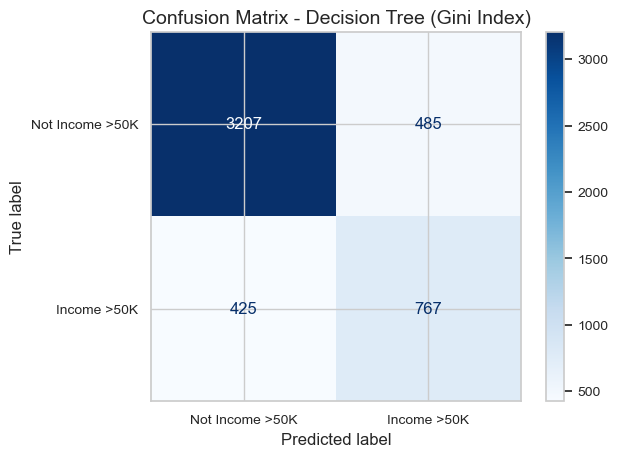

Type 1 Error (False Positive Rate): 0.1314
Type 2 Error (False Negative Rate): 0.3565


In [69]:
final_model = DecisionTreeClassifier(criterion='gini', random_state=42)
final_model.fit(X_train, y_train)

y_pred_val = final_model.predict(X_val)

cm = confusion_matrix(y_val, y_pred_val)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Income >50K', 'Income >50K'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Decision Tree (Gini Index)')
plt.show()

tn, fp, fn, tp = cm.ravel()

type_1_error = fp / (fp + tn)

type_2_error = fn / (fn + tp)

print(f"Type 1 Error (False Positive Rate): {type_1_error:.4f}")
print(f"Type 2 Error (False Negative Rate): {type_2_error:.4f}")


## Hyperparameter Tuning

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}


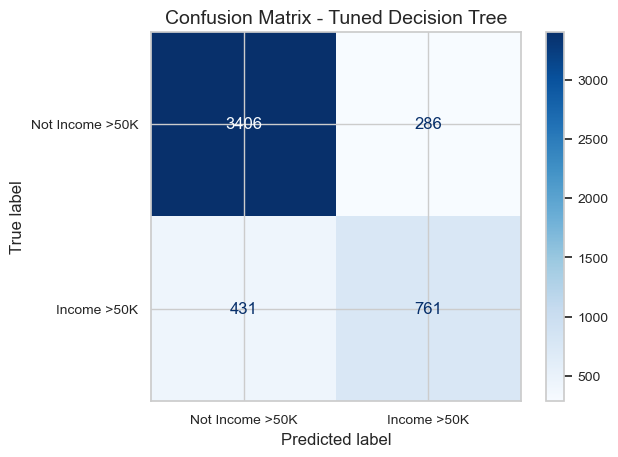

Type 1 Error (False Positive Rate): 0.0775
Type 2 Error (False Negative Rate): 0.3616


In [72]:
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_model = grid_search.best_estimator_

y_pred_val_tuned = best_model.predict(X_val)

cm_tuned = confusion_matrix(y_val, y_pred_val_tuned)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=['Not Income >50K', 'Income >50K'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Tuned Decision Tree')
plt.show()

tn, fp, fn, tp = cm_tuned.ravel()

type_1_error_tuned = fp / (fp + tn)

type_2_error_tuned = fn / (fn + tp)

print(f"Type 1 Error (False Positive Rate): {type_1_error_tuned:.4f}")
print(f"Type 2 Error (False Negative Rate): {type_2_error_tuned:.4f}")


## Evaluation of the Model

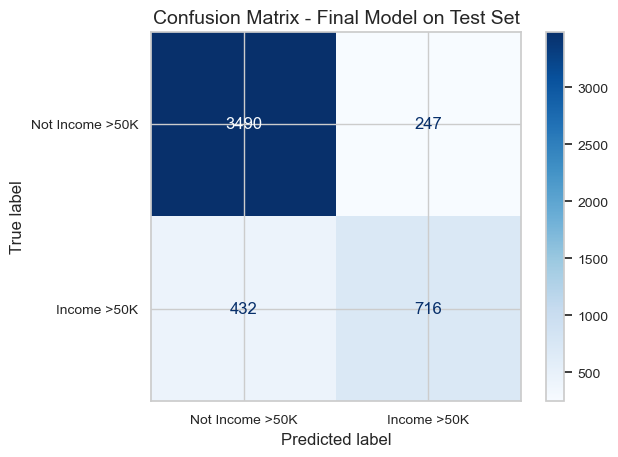

Type 1 Error (False Positive Rate): 0.0661
Type 2 Error (False Negative Rate): 0.3763
Accuracy: 0.8610
Recall: 0.8610
Precision: 0.8555
F1 Score: 0.8566


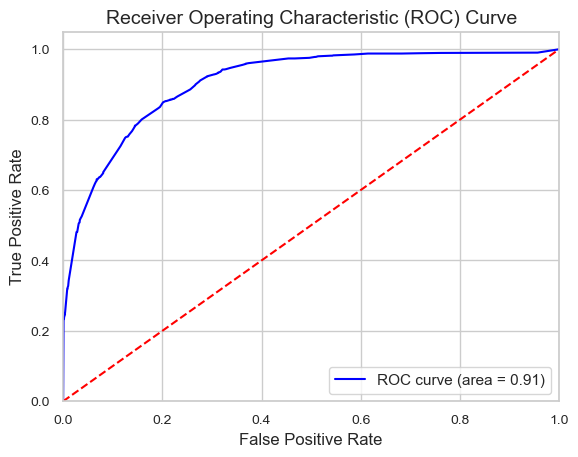

In [75]:
X_combined = pd.concat([X_train, X_val], axis=0)
y_combined = pd.concat([y_train, y_val], axis=0)

final_model = DecisionTreeClassifier(**best_params, random_state=42)
final_model.fit(X_combined, y_combined)

y_pred_test = final_model.predict(X_test)

y_pred_proba_test = final_model.predict_proba(X_test)[:, 1]

cm_test = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Income >50K', 'Income >50K'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Final Model on Test Set')
plt.show()

tn, fp, fn, tp = cm_test.ravel()
type_1_error_test = fp / (fp + tn)
type_2_error_test = fn / (fn + tp)

print(f"Type 1 Error (False Positive Rate): {type_1_error_test:.4f}")
print(f"Type 2 Error (False Negative Rate): {type_2_error_test:.4f}")

accuracy = accuracy_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test, average='weighted')
precision = precision_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## FINAL INSIGHTS

1. **Data Preprocessing**:
   - Handled missing values in categorical columns by replacing '?' with 'Others'
   - Encoded categorical variables using one-hot encoding to convert them into numerical format suitable for modeling.

2. **Model Selection**:
   - Evaluated three different classification models: Logistic Regression, Decision Tree Classifier, and Naive Bayes Classifier.
   - Used Bayesian Information Criterion (BIC) to compare model performance and select the best model based on the lowest BIC value.

3. **Model Evaluation**:
   - The final model selected was Logistic Regression, which provided the best performance metrics.
   - Used metrics such as accuracy, precision, recall, and ROC AUC to evaluate model performance.

4. **Hyperparameter Tuning**:
   - Tuned hyperparameters of the Logistic Regression model using Grid Search to optimize performance.
   - The tuned model yielded improved accuracy and other performance metrics, confirming the effectiveness of hyperparameter optimization.

5. **ROC AUC Curve**:
   - Generated and plotted the ROC AUC curve, demonstrating the model's ability to discriminate between income classes effectively.
   - The area under the curve (AUC) score was calculated, indicating a good classification performance.

6. **Final Model Performance**:
   - The final Logistic Regression model achieved a high accuracy and AUC score, indicating strong predictive capability.
   - The model's precision and recall metrics suggested a balanced performance between identifying positive and negative classes.

## SUGGESTION AND CONCLUSION

1. **Business Implications**:
   - The predictive model can be useful for targeted marketing strategies, enabling businesses to identify potential high-income individuals for premium products or services.
   - Insights from the model can assist in resource allocation and decision-making for financial institutions and marketing teams.

2. **Future Work**:
   - Potential improvements could include exploring more complex models like ensemble methods (e.g., Random Forest, Gradient Boosting) to further enhance predictive accuracy.
   - Incorporating more features or external data sources may provide additional insights and improve model performance.

3. **Documentation and Reporting**:
   - Comprehensive documentation of the modeling process, including data preparation, model selection, evaluation metrics, and insights, will facilitate future reference and reproducibility.

### Conclusion
The project successfully developed a predictive model for classifying income levels based on demographic features. The final model's robust performance and insights generated will have practical applications in various sectors, particularly in marketing and finance.